In [1]:
#Kütüphanelerin Eklenmesi
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics

In [3]:
#Veri setinin eklenmesi
veri = pd.read_csv("breast-cancer-wisconsin-data/data.csv")

In [4]:
#Veri Setine Genel Bir Bakış
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Başlıklara göz atmak
kolonlar = veri.columns
print(kolonlar)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### Verisetinin Temizlenmesi

Verisetinin bazı bölümleri kullanılmayacağı için temizlenmeli

In [6]:
list = ["id","Unnamed: 32"]
temiz = veri.drop(list, axis=1)

In [7]:
temiz.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
temiz.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
temiz["diagnosis"] = temiz['diagnosis'].map({"M":1, "B":0})

Text(0.5, 0.98, 'Kanser Türü')

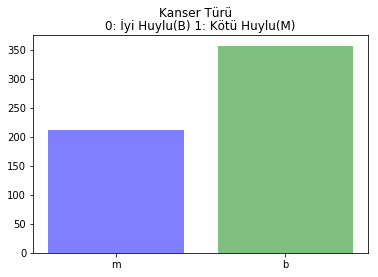

In [10]:
m = len(temiz["diagnosis"][temiz["diagnosis"] == 1])
b = len(temiz["diagnosis"][temiz["diagnosis"] == 0])
names = ["m","b"]
values = [m,b]
plt.bar(names,values,color = ("b","g"), alpha = 0.5)
plt.title("0: İyi Huylu(B) 1: Kötü Huylu(M)")
plt.suptitle("Kanser Türü")

In [11]:
features_mean=temiz.columns[1:11]
dfM=temiz[temiz['diagnosis'] ==1]
dfB=temiz[temiz['diagnosis'] ==0]

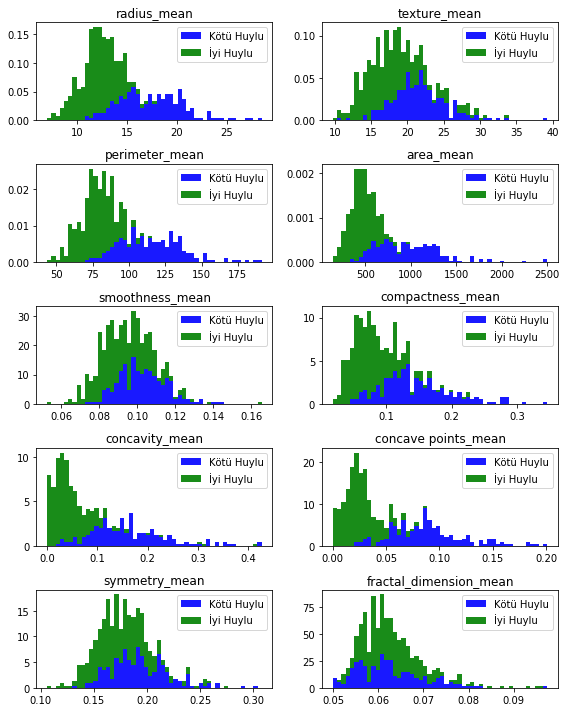

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(temiz[features_mean[idx]]) - min(temiz[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(temiz[features_mean[idx]]), max(temiz[features_mean[idx]]) + binwidth, binwidth) , alpha=0.9,stacked=True, density = True, label=['Kötü Huylu','İyi Huylu'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()


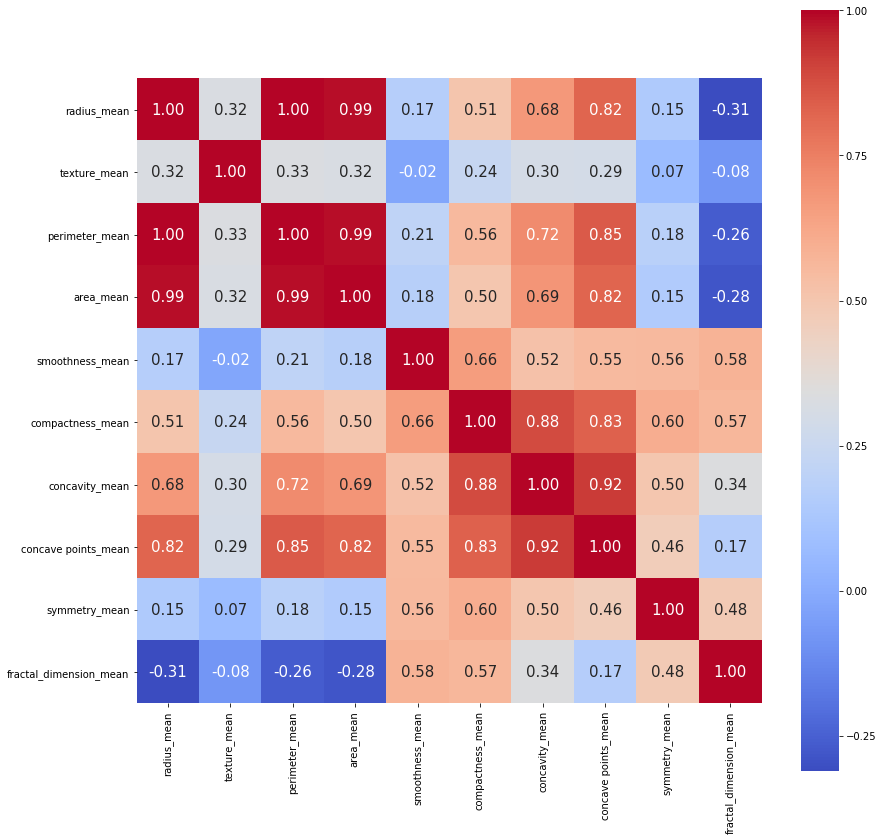

In [13]:
corr = temiz[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

buradan korelasyonlara bakıyorum ve hangilerini kullanabileceğimi tespit ediyorum

In [14]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [15]:
train, test = train_test_split(temiz, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [16]:
train_X = train[prediction_var]
train_y=train.diagnosis
test_X= test[prediction_var]
test_y =test.diagnosis

### Random Forest

In [17]:
modelrf = RandomForestClassifier(n_estimators=100)
modelrf.fit(train_X,train_y)
predictiontf = modelrf.predict(test_X)
accrf = metrics.accuracy_score(predictiontf,test_y)
print(accrf)

0.9181286549707602


### Support Vector Machine - SVM

In [18]:
modelsvm = svm.SVC(gamma = "auto")
modelsvm.fit(train_X,train_y)
predictionsvm = modelsvm.predict(test_X)
accsvm = metrics.accuracy_score(predictionsvm,test_y)
print(accsvm)

0.847953216374269


### Decision Tree Classifier

In [19]:
modeldtc = DecisionTreeClassifier()
modeldtc.fit(train_X,train_y)
predictiondtc=modeldtc.predict(test_X)
accdtc = metrics.accuracy_score(predictiondtc,test_y)
print(accdtc)

0.8771929824561403


Text(0.5, 1.0, 'Modellerin Doğruluk Oranları')

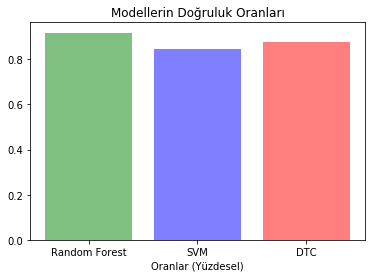

In [20]:
comp = [accrf, accsvm, accdtc]
model_names = ["Random Forest","SVM","DTC"]
fig,ax = plt.subplots()
ax.bar(model_names,comp,color = ("g","b","r"),ecolor ="black", alpha = 0.5)
ax.invert_yaxis
ax.set_xlabel('Oranlar (Yüzdesel)')
ax.set_title('Modellerin Doğruluk Oranları')

### Tüm Nicelikler Eklendiğinde

In [21]:
prediction_var_all = features_mean

In [22]:
train_X= train[prediction_var_all]
train_y= train.diagnosis
test_X = test[prediction_var_all]
test_y = test.diagnosis

#### Random Forest Tüm Nicelikler

In [23]:
modelrf_all=RandomForestClassifier(n_estimators=100)

In [24]:
modelrf_all.fit(train_X,train_y)
predictionrf_all = modelrf_all.predict(test_X)
metrics.accuracy_score(predictionrf_all,test_y)

0.9298245614035088

In [25]:
featimp = pd.Series(modelrf_all.feature_importances_, index=prediction_var_all).sort_values(ascending=False)
print(featimp)

concave points_mean       0.259983
perimeter_mean            0.203137
area_mean                 0.151128
concavity_mean            0.131135
radius_mean               0.092094
texture_mean              0.060448
compactness_mean          0.041575
smoothness_mean           0.023309
fractal_dimension_mean    0.019254
symmetry_mean             0.017937
dtype: float64


#### SVM Tüm Nicelikler

In [26]:
model = svm.SVC(gamma = "auto")
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6549707602339181

iki karşılaştırmadan görülebilir ki tüm nicelikler için çalışıldığında randomforest svm'e göre daha iyi sonuçlar veriyor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A7AE3B400>,
      dtype=object)

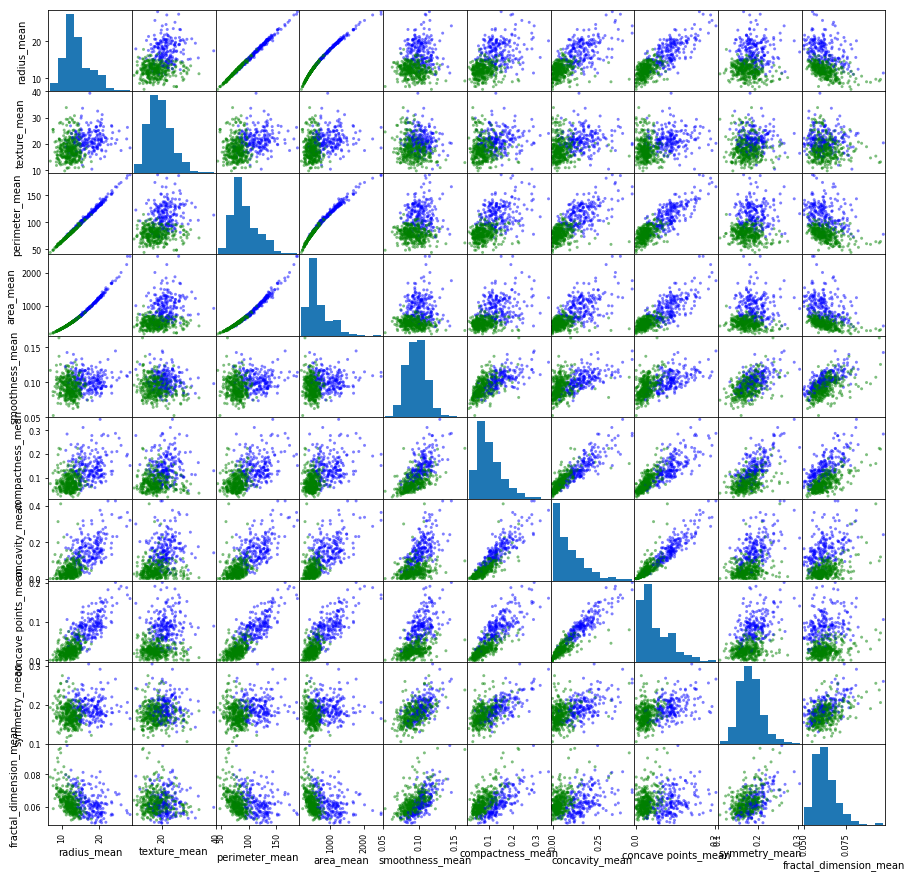

In [27]:
color_function = {0: "green", 1: "blue"}
colors = temiz["diagnosis"].map(lambda x: color_function.get(x))
pd.plotting.scatter_matrix(temiz[features_mean], c=colors, alpha = 0.5, figsize = (15, 15))

### Yapay Sinir Ağları ile Öğrenme (ANN)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [29]:
data = pd.read_csv("breast-cancer-wisconsin-data/data.csv")
del data['Unnamed: 32']

### Verileri Yeniden Bölme

In [30]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values


from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
classifier = Sequential()

In [32]:
classifier.add(Dense(activation='relu', input_dim=30, kernel_initializer= "uniform", units=16,))
classifier.add(Dropout(rate=0.1))

In [33]:
classifier.add(Dense(units=16, kernel_initializer = 'uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

In [34]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [35]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
classifier.fit(X_train, y_train, batch_size=80, epochs=250)

Epoch 1/250
512/512 [==============================] - 0s 522us/step - loss: 0.6922 - acc: 0.6367
Epoch 2/250
512/512 [==============================] - 0s 24us/step - loss: 0.6892 - acc: 0.6523
Epoch 3/250
512/512 [==============================] - 0s 21us/step - loss: 0.6837 - acc: 0.6992
Epoch 4/250
512/512 [==============================] - 0s 19us/step - loss: 0.6742 - acc: 0.7832
Epoch 5/250
512/512 [==============================] - 0s 21us/step - loss: 0.6587 - acc: 0.8633
Epoch 6/250
512/512 [==============================] - 0s 19us/step - loss: 0.6342 - acc: 0.9004
Epoch 7/250
512/512 [==============================] - 0s 25us/step - loss: 0.5985 - acc: 0.9219
Epoch 8/250
512/512 [==============================] - 0s 18us/step - loss: 0.5513 - acc: 0.9316
Epoch 9/250
512/512 [==============================] - 0s 23us/step - loss: 0.4974 - acc: 0.9453
Epoch 10/250
512/512 [==============================] - 0s 19us/step - loss: 0.4357 - acc: 0.9453
Epoch 11/250
512/512 [======

512/512 [==============================] - 0s 23us/step - loss: 0.0459 - acc: 0.9883
Epoch 85/250
512/512 [==============================] - 0s 18us/step - loss: 0.0458 - acc: 0.9922
Epoch 86/250
512/512 [==============================] - 0s 19us/step - loss: 0.0457 - acc: 0.9883
Epoch 87/250
512/512 [==============================] - 0s 18us/step - loss: 0.0475 - acc: 0.9902
Epoch 88/250
512/512 [==============================] - 0s 18us/step - loss: 0.0448 - acc: 0.9883
Epoch 89/250
512/512 [==============================] - 0s 19us/step - loss: 0.0439 - acc: 0.9902
Epoch 90/250
512/512 [==============================] - 0s 19us/step - loss: 0.0458 - acc: 0.9883
Epoch 91/250
512/512 [==============================] - 0s 20us/step - loss: 0.0487 - acc: 0.9883
Epoch 92/250
512/512 [==============================] - 0s 23us/step - loss: 0.0450 - acc: 0.9902
Epoch 93/250
512/512 [==============================] - 0s 25us/step - loss: 0.0467 - acc: 0.9883
Epoch 94/250
512/512 [===========

512/512 [==============================] - 0s 23us/step - loss: 0.0304 - acc: 0.9883
Epoch 168/250
512/512 [==============================] - 0s 33us/step - loss: 0.0266 - acc: 0.9902
Epoch 169/250
512/512 [==============================] - 0s 19us/step - loss: 0.0264 - acc: 0.9922
Epoch 170/250
512/512 [==============================] - 0s 35us/step - loss: 0.0274 - acc: 0.9922
Epoch 171/250
512/512 [==============================] - 0s 27us/step - loss: 0.0282 - acc: 0.9941
Epoch 172/250
512/512 [==============================] - 0s 35us/step - loss: 0.0260 - acc: 0.9922
Epoch 173/250
512/512 [==============================] - 0s 23us/step - loss: 0.0259 - acc: 0.9922
Epoch 174/250
512/512 [==============================] - 0s 29us/step - loss: 0.0261 - acc: 0.9922
Epoch 175/250
512/512 [==============================] - 0s 27us/step - loss: 0.0251 - acc: 0.9902
Epoch 176/250
512/512 [==============================] - 0s 27us/step - loss: 0.0272 - acc: 0.9902
Epoch 177/250
512/512 [=

512/512 [==============================] - 0s 19us/step - loss: 0.0175 - acc: 0.9902
Epoch 250/250
512/512 [==============================] - 0s 21us/step - loss: 0.0132 - acc: 0.9961


In [37]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
print("Tahmin Oranı {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Tahmin Oranı 100.0%


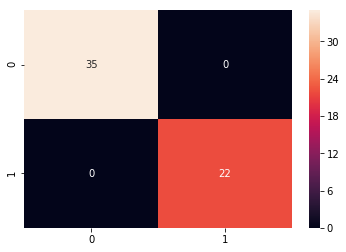

In [40]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')